In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv('stack-overflow-developer-survey-2022/survey_results_public.csv'))
print(f'rows: {len(df)}\ncols: {len(df.columns)}')
df.head()

rows: 73268
cols: 79


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


# Note:
    1) The analysed dataset is from survey taken on StackOverflow in 2022 that was all about programming
    2) Over 70 000 (or 73268 to be exact) respondents have taken the survey
    3) There were close to 80 questions for each respondent

In [3]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

# Note:
    1) There are many interesting questions in the dataset, but I wanted to stick to people learning how to code and mostly focus on the corellations between age and:
       a) coding language
       b) coding activities
       c) resources used while learning
    2) Of course there were many other intresting deatils in the dataset that are worth digging into, but I've chosen those because I find them most attractive

In [4]:
# searching for people learning to code
people_learning_df = df.loc[
    (df['MainBranch'] == 'I am learning to code')
]

print(f'rows: {len(people_learning_df)}\ncols: {len(people_learning_df.columns)}')

rows: 6309
cols: 79


# Note:
After selecting the people learning how to code our dataset shrunk by about 90%, but 6309 records will still give good results 

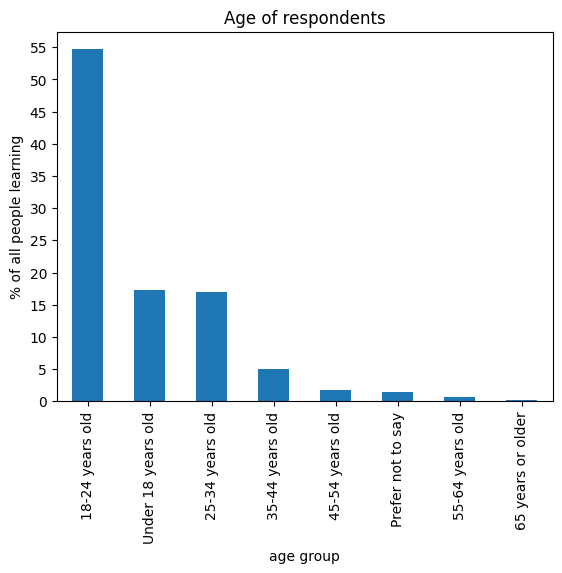

In [5]:
# getting the age of respondents
age = people_learning_df['Age'].value_counts()
age_percentage = (100. * age /
                 len(people_learning_df)).round(2)  # percentage

age_percentage.plot(
    kind='bar',
    title='Age of respondents',
    xlabel='age group',
    ylabel='% of all people learning',
    yticks=np.arange(0, 60, step=5)
)
plt.show()

# Note:
    1) There are 7 age groups:
       1. under 18 y.o.
       2. 18-24 y.o.
       3. 25-34 y.o.
       4. 35-44 y.o.
       5. 45-54 y.o.
       6. 55-64 y.o.
       7. 65+ y.o.
    2) Most of the respondents (90%) are at most 34 years old.


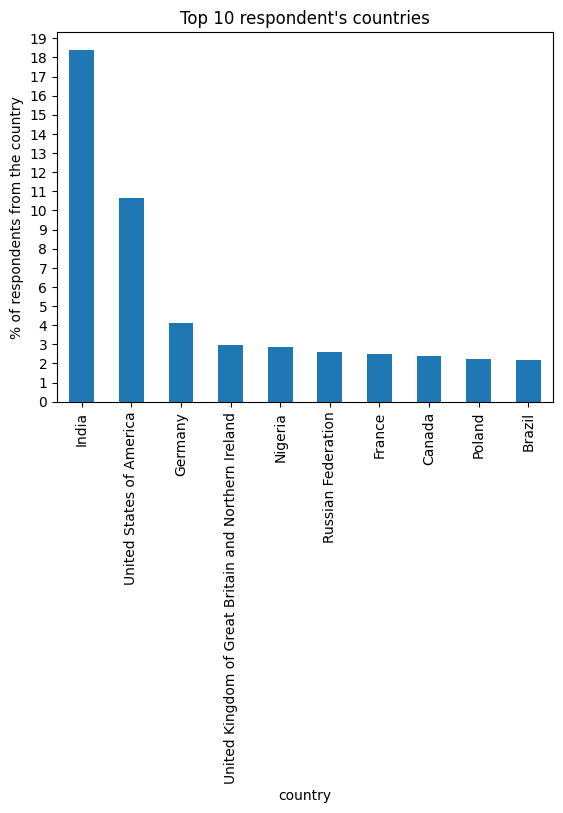

In [6]:
# top 10 countries

countries_percentages = (
    100 * people_learning_df.Country.value_counts() / len(people_learning_df)).round(2)

countries_percentages[:10].plot(
    kind='bar',
    xlabel='country',
    ylabel='% of respondents from the country',
    title='Top 10 respondent\'s countries',
    yticks=np.arange(0, 20, step=1)
)
plt.show()

# Note:
India and USA are the countries that gave the most responses in the survey (~30% of the responses)

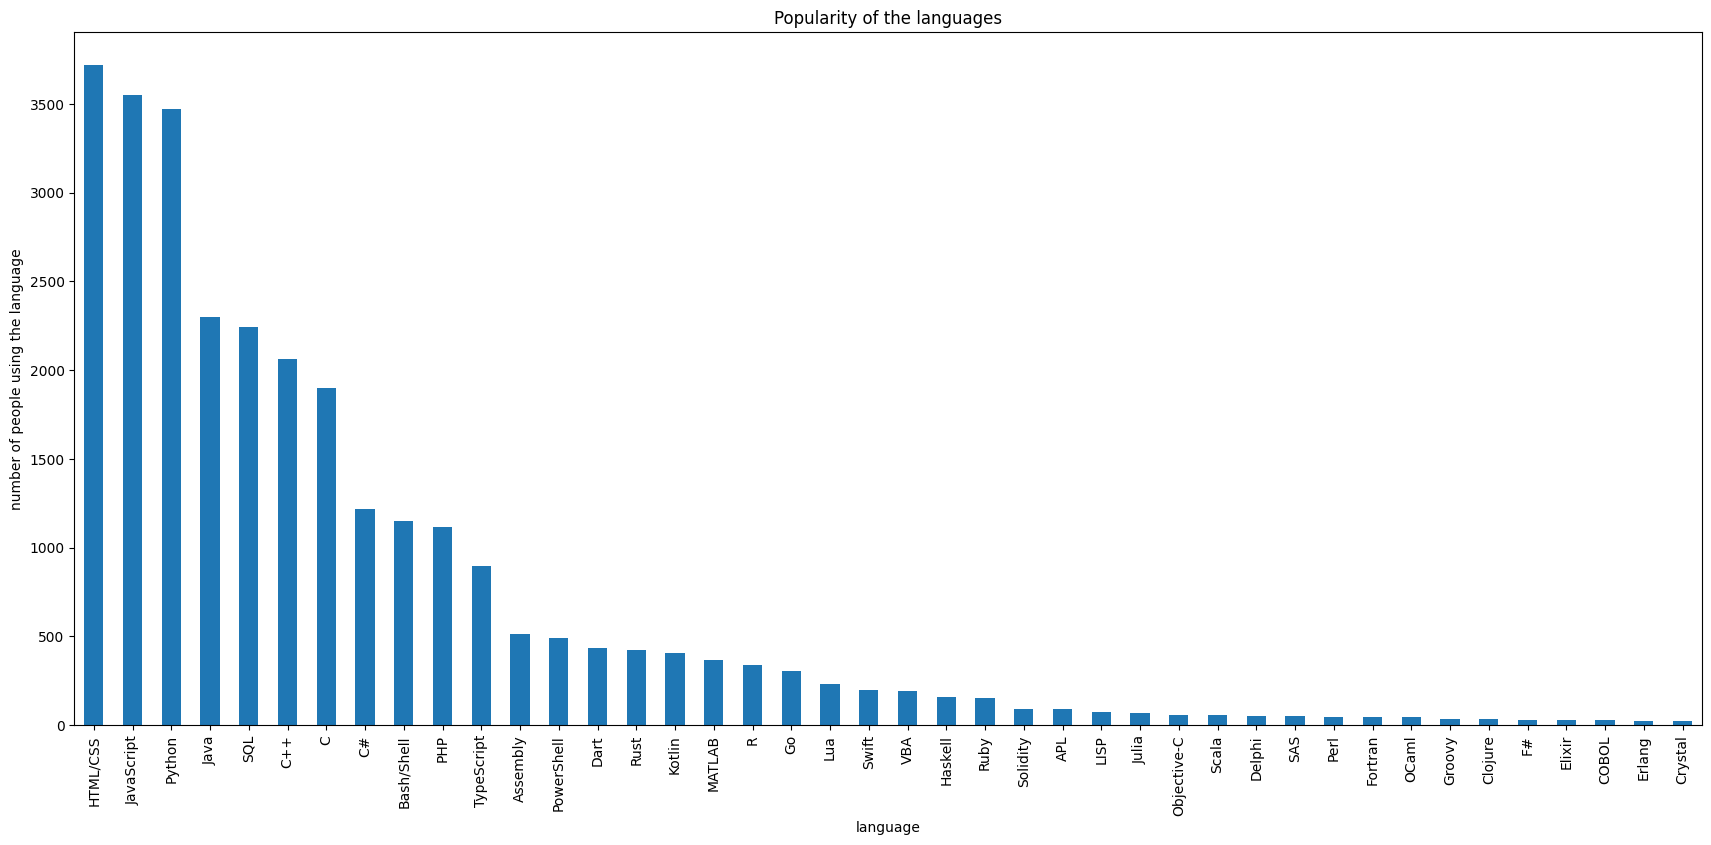

In [7]:
# popularity of languages
plt.figure(figsize=(21, 9))

languages = people_learning_df['LanguageHaveWorkedWith'].str.split(';', expand=True)
languages_appearances = languages.apply(pd.value_counts).sum(axis=1).sort_values(ascending=False)
languages_appearances.plot(
    kind='bar',
    title='Popularity of the languages', 
    xlabel='language', 
    ylabel='number of people using the language'
)

plt.show()

# Note:
    1) We can see that there were 42 options when it came to language choice
    2) One important fact is that the respondents were able to choose more than 1 language
    3) From the bar plot we can see that the most popular languages among people learning how to code were HTML/CSS | Javascript | Python
    4) What I found really interesting is that a language like Assembly is higher on the popularity list than Rust, Kotlin or Go which is really odd for me because Assembly is quite hard of a language to understand and write in

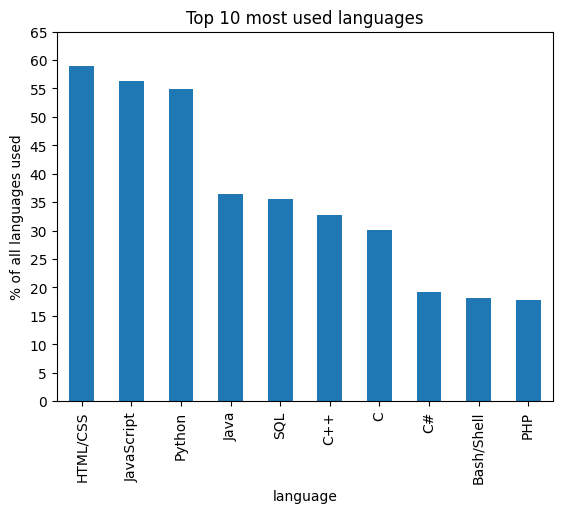

In [8]:
# top 10 most used languages
percentage_df = (100. * languages_appearances / len(people_learning_df)).round(2) # percentage
percentage_df[:10].plot(
    kind='bar',
    title='Top 10 most used languages',
    xlabel='language',
    ylabel='% of all languages used',
    yticks=np.arange(0, 70, step=5)
)
plt.show()

# Note:
    1) Python thanks it's position (3rd) probably because of the wide variety of things you can achieve in the language - from basic scripts optimizing daily life to web development and machine learning. 
    2) The first two positions - HTML/CSS and JS fall in to the same bucket of web-development where they shine because of flexibility and simplicity. There are many online resources teaching those 3 (like YouTube videos or many courses) and also they are fun to learn e.g. building own website and watching it grow as the time passes and our experience rises. 

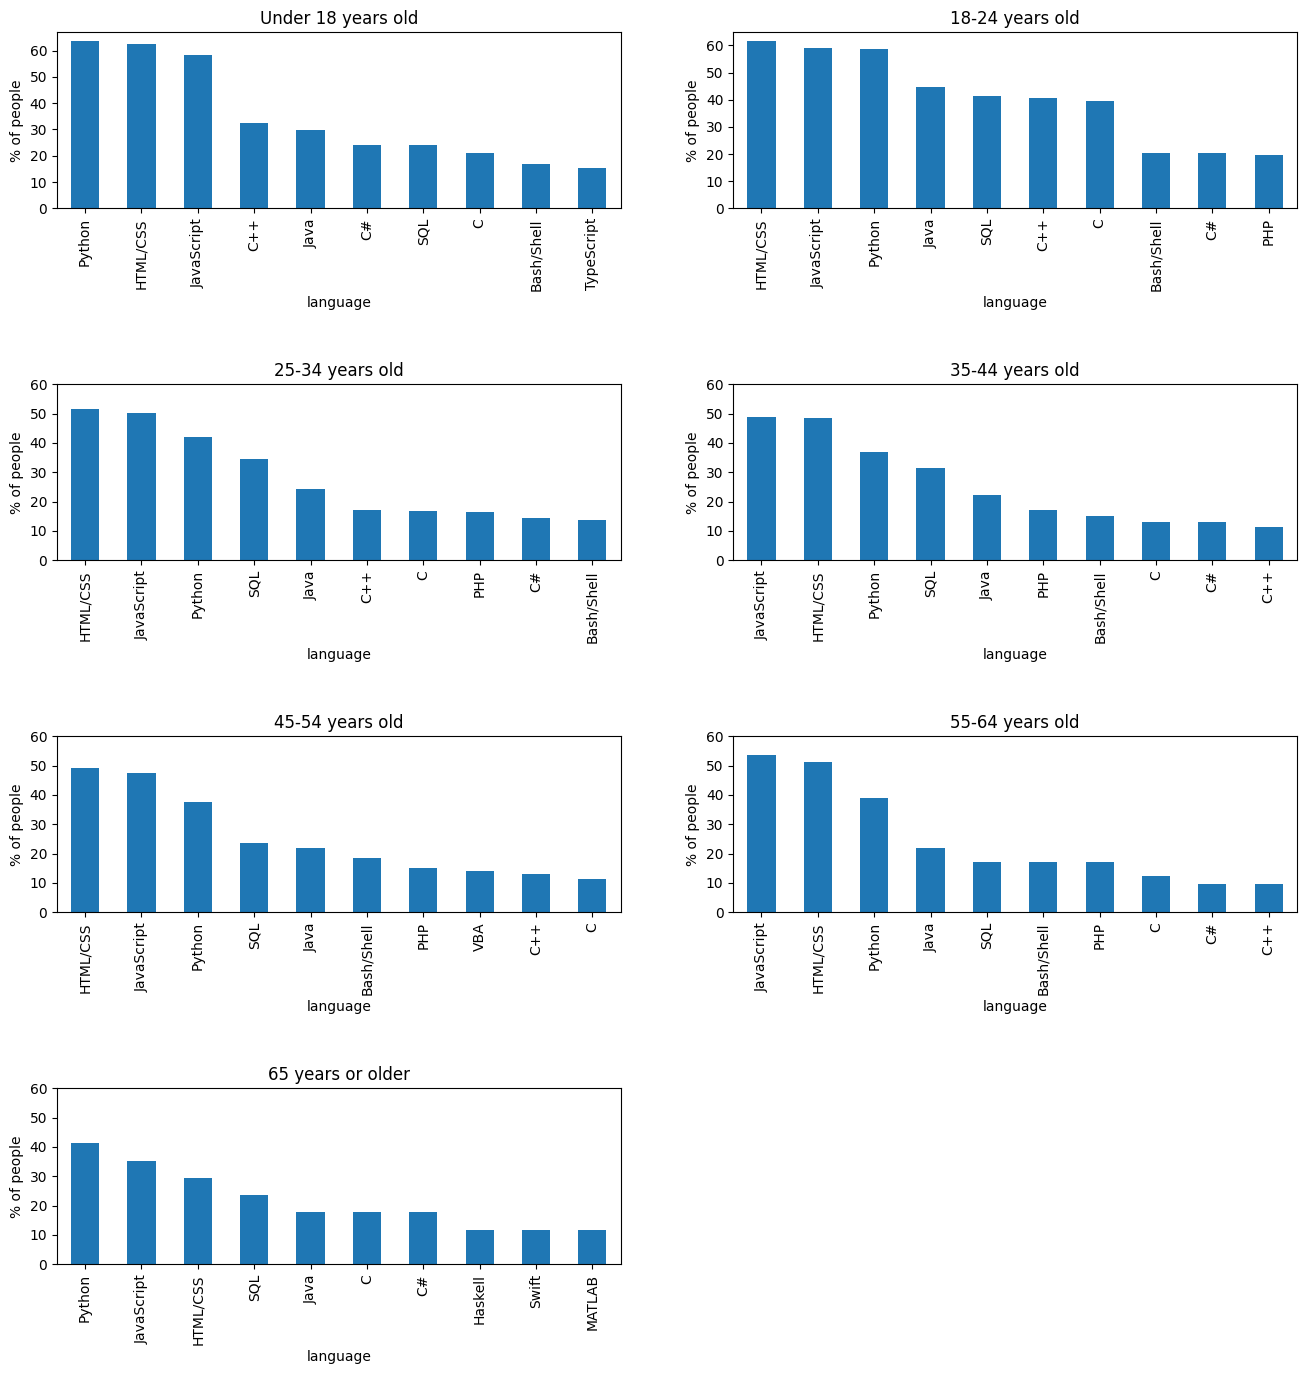

In [9]:
# top 10 languages on given age

ages = people_learning_df[people_learning_df.Age !=
                          'Prefer not to say'].Age.dropna().unique()
ages = [ages[i] for i in [2, 0, 4, 1, 5, 3, 6]]
dfs = [
    100 * people_learning_df.loc[(people_learning_df['Age'] == age)]['LanguageHaveWorkedWith'].str.split(';', expand=True).apply(
        pd.value_counts).sum(axis=1).sort_values(ascending=False) / round(len(people_learning_df.loc[((people_learning_df['Age'] == age))]), 2)
    for age in ages
]

plt.figure(figsize=(16, 16))

for i, dataframe in enumerate(dfs):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace=1)
    dataframe[:10].plot(
        kind='bar',
        xlabel='language',
        ylabel='% of people',
        yticks=np.arange(0, 70, step=10),
        title=ages[i]
    )

plt.show()

# Note:
    1) When we split the responses by the age of the respondents the top 3 languages still stay the same - Python, HTML/CSS, Javascript, meaning that no matter the age the languages still stay popular - probably because they are easy to learn (like Python), or writing in them can make you see the live results like HTML/CSS/JS.
    2) In all of those age groups we can see Java, C, C#, C++, PHP but the group 65+ is a little bit different. We can see languages like Haskell/MATLAB/Swift although the 65+ age group has a very limited data 

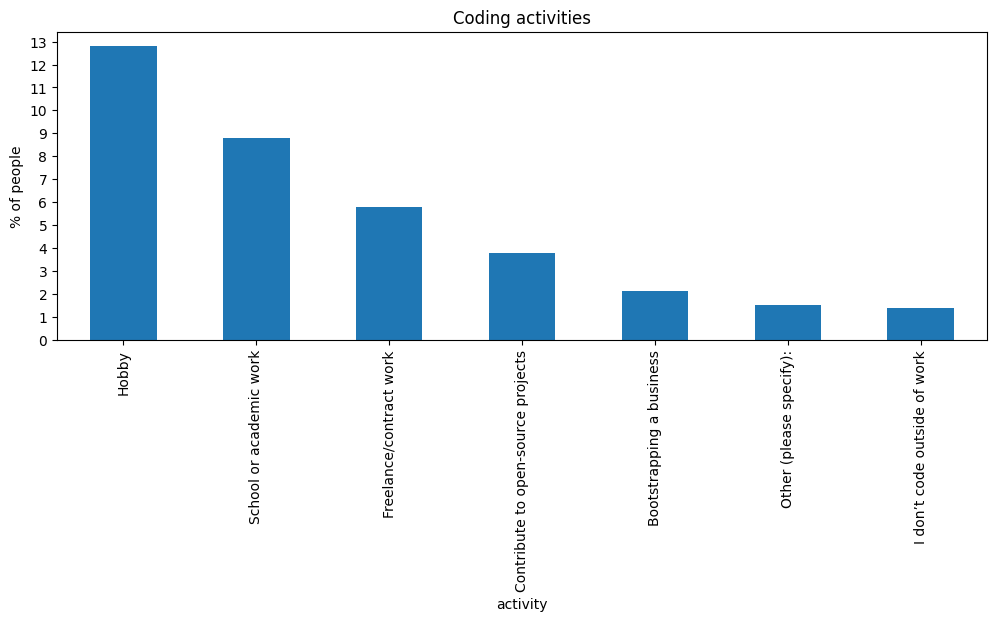

In [10]:
# coding activities

plt.figure(figsize=(12, 4))



activities = people_learning_df['CodingActivities'].str.split(';', expand=True)
activities_appearances = (100 * activities.apply(pd.value_counts).sum(axis=1).sort_values(ascending=False) / len(people_learning_df)).round(2)
activities_appearances.plot(
    kind='bar',
    title='Coding activities',
    xlabel='activity',
    ylabel='% of people',
    yticks=np.arange(0, 14, step=1)
)
plt.show()

# Note:
It's very heartwarming seeing the 'Hobby' bar rising to the top of the most popular coding activities chart - it means that the learning programming is not always about the money it can give you. Also, the low 'I don't code outside of work' bar means that most of the people don't take programming as their job - but rather passion.

41


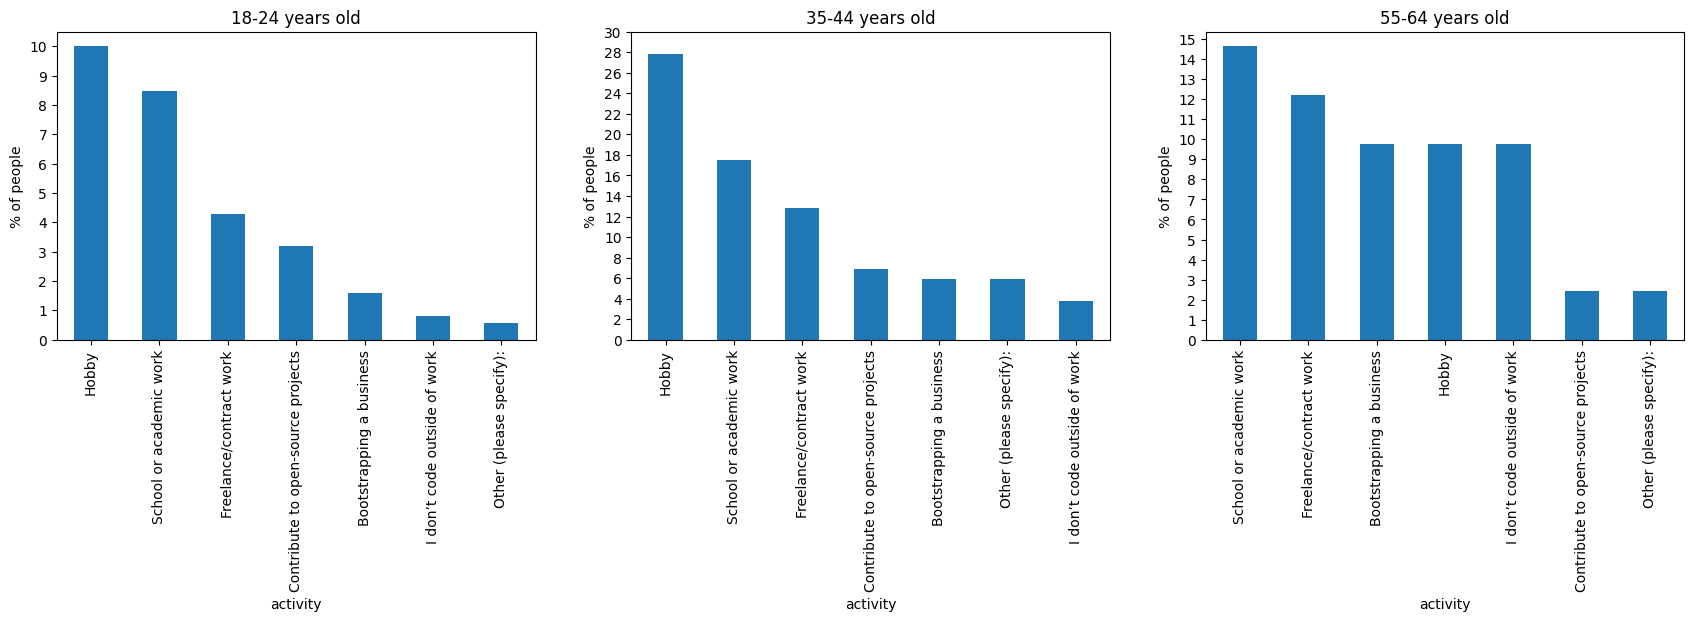

In [11]:
plt.figure(figsize=(21, 4))

age_groups = [ages[1], ages[3], ages[5]]
ticks = [np.arange(0, 11, step=1), np.arange(0, 32, step=2), np.arange(0, 16, step=1)]

print(len(people_learning_df.loc[(people_learning_df['Age'] == '55-64 years old')]))

dfs = [
    100 * people_learning_df.loc[(people_learning_df['Age'] == age)]['CodingActivities'].str.split(';', expand=True).apply(
        pd.value_counts).sum(axis=1).sort_values(ascending=False) / round(len(people_learning_df.loc[people_learning_df['Age'] == age]), 2)
    for age in age_groups
]

for i, dataframe in enumerate(dfs):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace=0.25)
    dataframe.plot(
        kind='bar',
        xlabel='activity',
        ylabel='% of people',
        yticks=ticks[i],
        title=age_groups[i]
    )

# Note:
    1) I've chosen these 3 age groups because I've wanted to have a bigger view on age-coding_activity correlation. Unfortunately the correlation is minor - when the age reaches a point of ~50 years the 'hobby' part of coding is slightly falling off
    2) The rise of 'School or academic work' in the age group of 55-64 is probably caused by teachers/university professors need of learning something new to keep up with the standards
    3) The high percentage of people thinking about coding as a hobby is very promising, because the coding should be this way - you should have fun while self-improving

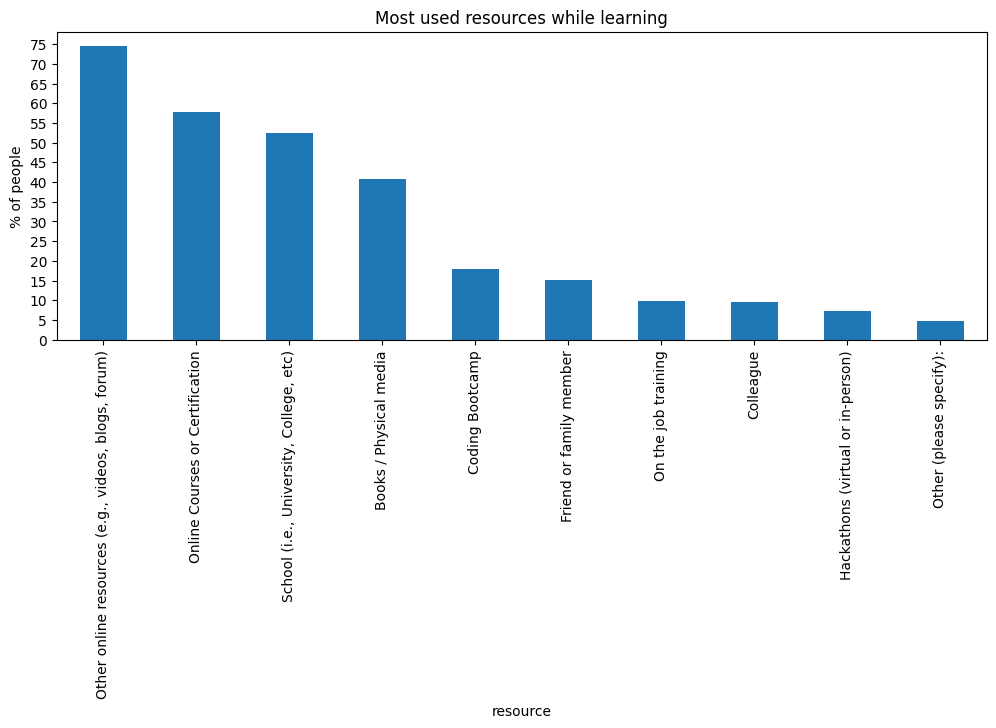

In [12]:
# resources used while learning

plt.figure(figsize=(12, 4))

learning_how_to = people_learning_df['LearnCode'].str.split(';', expand=True)
learning_how_to_appearances = (100 * learning_how_to.apply(pd.value_counts).sum(axis=1).sort_values(ascending=False) / len(people_learning_df)).round(2)
learning_how_to_appearances.plot(
    kind='bar',
    title='Most used resources while learning',
    xlabel='resource',
    ylabel='% of people',
    yticks=np.arange(0, 80, step=5)
)
plt.show()


# Note:
    1) The first resource (videos, blogs or forums) are the resources avaliable for free thus the popularity
    2) As the time goes on the books/physical medias are slowly getting replaced by the online resources, but they are still in the 4th place
    3) Weirdly, resources like Hackatons (or other competitions) are ranking the lowest despite the amount of experience they can give

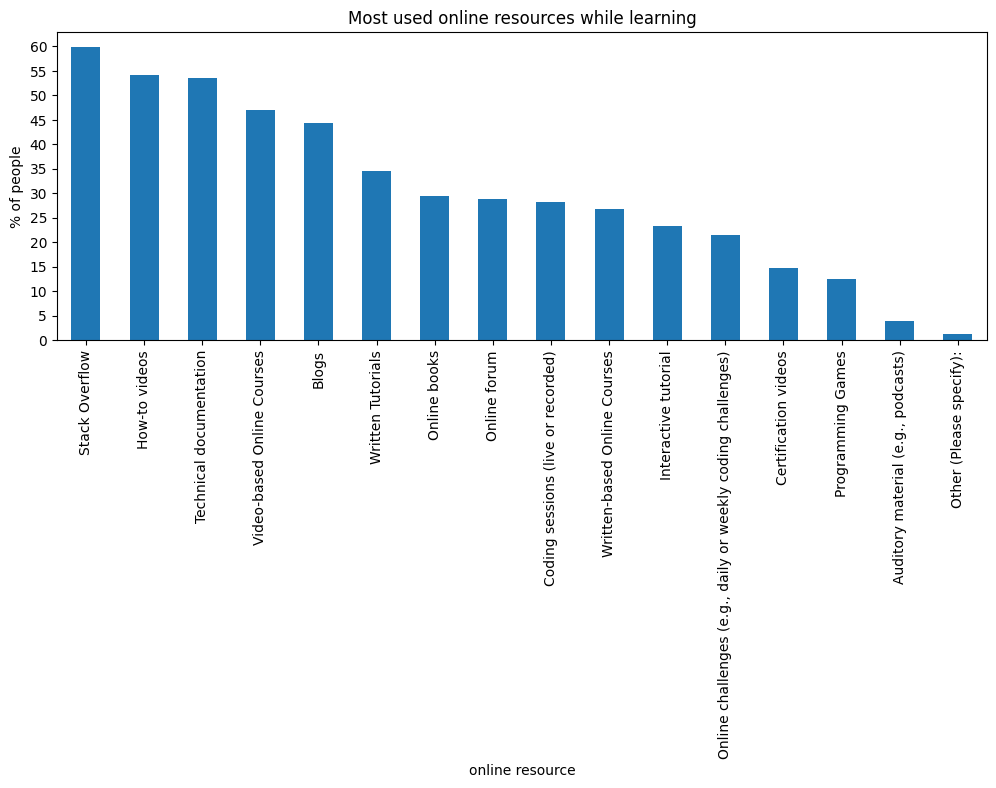

In [13]:
# online resources used while learning

plt.figure(figsize=(12, 4))

learning_how_to = people_learning_df['LearnCodeOnline'].str.split(';', expand=True)
learning_how_to_appearances = (100 * learning_how_to.apply(pd.value_counts).sum(axis=1).sort_values(ascending=False) / len(people_learning_df)).round(2)
learning_how_to_appearances.plot(
    kind='bar',
    title='Most used online resources while learning',
    xlabel='online resource',
    ylabel='% of people',
    yticks=np.arange(0, 65, step=5)
)
plt.show()


# Note:
    1) The 'online resources' don't differ to much from the 'resources' data, although what I found interesting is that a lot of people find technical documentation really useful (not like it's not but most of the time technical documentation is difficult to understand and we are trying to find an easier answer)
    2) The position that will probably grow over the years is 'Programming Games', because of the interactivity that they give. They probably won't teach many useful things but they will give the learner a much easier beginning